# Source and Prov Approaches


## About

This section will present an identifer discussion and then focus 
on approaches publishers can use to provide more source and provenance 
information.This section is heavily influenced 
by {cite:ps}`49385` {cite:ps}`googledataset`  and the reader is highly
encouraged to read these references.  

It is not uncommon for a single resource to be described at multiple locations.
The following items represent properties that can help address the 
disambiguation of resources as the Ocean InfoHub graph grows.  

We will look at the following seven properties:
identifier, provider, publisher, sameAs, isBasesOn, subjectOf and its 
inverse, about.  

It should be noted that only subjectOf and sameAs can be used on type
Thing.  That is, these properties can be used on any Schema.org type.

The others have their domain and range values listed.  All these 
properties work on CreativeWork. So they are all valid for that type
and subtypes like Dataset and Map.  



### Example Graph

The following example graph shows some of the properties we can use
to provide source and provenance information about a resource. 

```{literalinclude} ./graphs/creativework.json
:linenos:
:emphasize-lines: 7-33
```

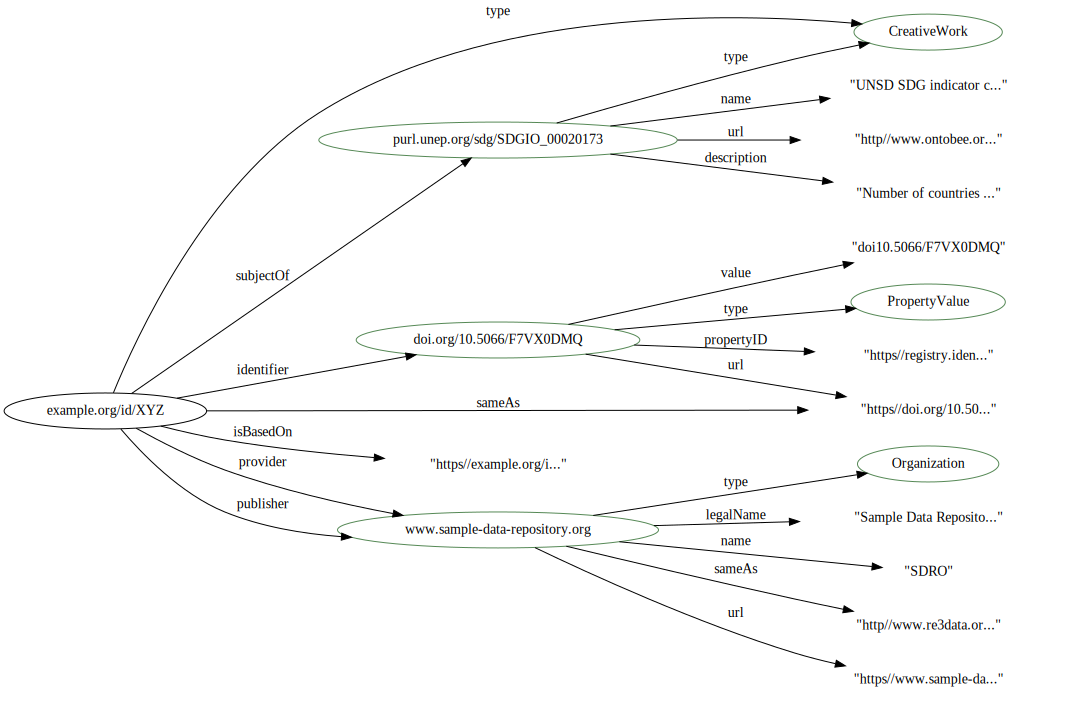

In [1]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/creativework.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

### identifier

This is the main subject of the start of this section.  Please
refer there for details on this property.  


````{panels}
Values expected to be one of these types
^^^
* [PropertyValue](https://schema.org/PropertyValue)
* [Text](https://schema.org/Text)
* [URL](https://schema.org/URL)
+++
Range
---

Used on these types
^^^
* [Thing](https://schema.org/Thing)
+++
Domain
````

{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/id/XYZ",
    "@type": "CreativeWork",
    "identifier": {
        "@id": "https://doi.org/10.5066/F7VX0DMQ",
        "@type": "PropertyValue",
        "propertyID": "https://registry.identifiers.org/registry/doi",
        "url": "https://doi.org/10.5066/F7VX0DMQ",
        "value": "doi:10.5066/F7VX0DMQ"
    }
}


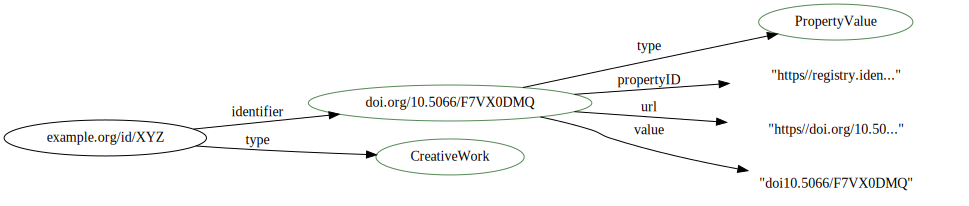

In [2]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/creativework.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "CreativeWork",
  "identifier": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)

#### propertyID

A commonly used identifier for the characteristic represented by the property, e.g. a manufacturer or a standard code for a property. propertyID can be (1) a prefixed string, mainly meant to be used with standards for product properties; (2) a site-specific, non-prefixed string (e.g. the primary key of the property or the vendor-specific id of the property), or (3) a URL indicating the type of the property, either pointing to an external vocabulary, or a Web resource that describes the property (e.g. a glossary entry). Standards bodies should promote a standard prefix for the identifiers of properties from their standards. 

#### value

The value of the quantitative value or property value node. For PropertyValue, 
it can be 'Text;', 'Number', 'Boolean', or 'StructuredValue'.

#### url (pointing to type URL)

URL of the item.


### provider

schema.org/provider

> The service provider, service operator, or service performer; the goods
> producer. Another party (a seller) may offer those services or goods on behalf
> of the provider. A provider may also serve as the seller.

For OIH this is the agent that is responsible for distributing the resource
and the descriptive metadata.  That is, the provider actually runs and supports
the services that presents the resource on the net or otherwise makes the 
data available. 

````{panels}
Values expected to be one of these types
^^^
* [Organization](https://schema.org/Organization)
* [Person](https://schema.org/Person)
+++
Range
---

Used on these types
^^^
* [CreativeWork](https://schema.org/CreativeWork)
* [EducationalOccupationalProgram](https://schema.org/EducationalOccupationalProgram)
* [Invoice](https://schema.org/Invoice)
* [ParcelDelivery](https://schema.org/ParcelDelivery)
* [Reservation](https://schema.org/Reservation)
* [Service](https://schema.org/Service)
* [Trip](https://schema.org/Trip) 
+++
Domain
````

{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/id/XYZ",
    "@type": "CreativeWork",
    "provider": {
        "@id": "https://www.sample-data-repository.org",
        "@type": "Organization",
        "legalName": "Sample Data Repository Office",
        "name": "SDRO",
        "sameAs": "http://www.re3data.org/repository/r3dxxxxxxxxx",
        "url": "https://www.sample-data-repository.org"
    }
}


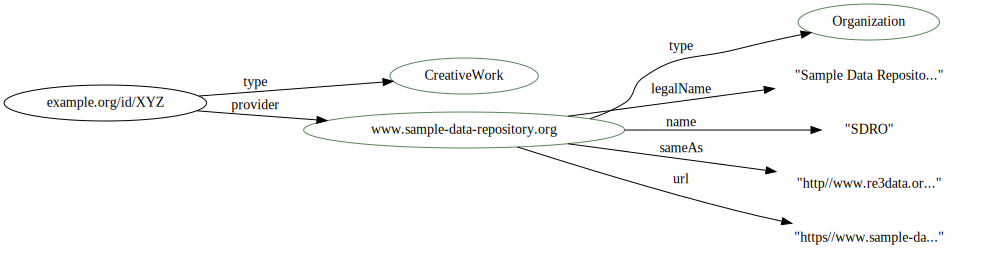

In [3]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/creativework.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "CreativeWork",
  "provider": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)

### publisher

See: [schema.org/publisher](https://schema.org/publisher) 

The publisher is defined as "The publisher of the creative work".  This is 
viewed as the agent that is primarily responsible for making the content described
by the structured metadata.  

````{panels}
Values expected to be one of these types
^^^
* [Organization](https://schema.org/Organization)
* [Person](https://schema.org/Person)
+++
Range
---

Used on these types
^^^
* [CreativeWork](https://schema.org/CreativeWork)
+++
Domain
````

{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/id/XYZ",
    "@type": "CreativeWork",
    "publisher": {
        "@id": "https://www.sample-data-repository.org",
        "@type": "Organization",
        "legalName": "Sample Data Repository Office",
        "name": "SDRO",
        "sameAs": "http://www.re3data.org/repository/r3dxxxxxxxxx",
        "url": "https://www.sample-data-repository.org"
    }
}


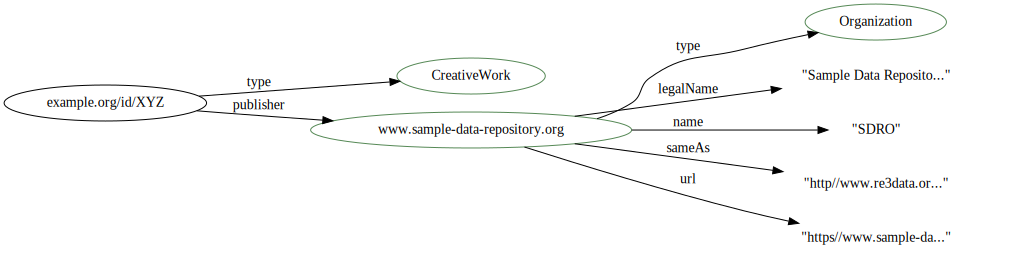

In [4]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/creativework.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "CreativeWork",
  "publisher": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)

### sameAs

See: [schema.org/sameAs](https://schema.org/sameAs)

The sameAs property links a Thing to a URL.  It is expected that the
URL is a resource that is the the most canonical URL for the original.  

In cases where your resource is not the canonical URL, you can use the
sameAs property to link to the canonical URL.  This is useful when you wish
to publish a resource and give credit to the original resource.  Note, 
in this case the resource must not be altered, but actually be the same 
as the canonical URL resource. 

The sameAs property should always point to only one resource.  It is not 
logically consistent to point to multiple sameAs resources.

````{panels}
Values expected to be one of these types
^^^
* [URL](https://schema.org/URL)
+++
Range
---

Used on these types
^^^
* [Thing](https://schema.org/Thing)
+++
Domain
````

{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/id/XYZ",
    "@type": "CreativeWork",
    "sameAs": "https://doi.org/10.5066/F7VX0DMQ"
}


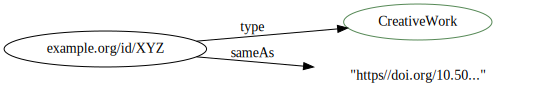

In [5]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/creativework.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "CreativeWork",
  "sameAs": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)

### isBasedOn

See: [schema.org/isBasedOn](https://schema.org/isBasedOn)

Where sameAs is used to link to the canonical URL of the resource, isBasedOn
provides a means to link derivative works to the original resource this new
resources is based on.  

The isBasedOn property can be used to link to multiple resources if more 
than one was used in the generation of this new resource.  

````{panels}
Values expected to be one of these types
^^^
* [CreativeWork](https://schema.org/CreativeWork)
* [Product](https://schema.org/Product)
* [URL](https://schema.org/URL)
+++
Range
---

Used on these types
^^^
* [CreativeWork](https://schema.org/CreativeWork)
+++
Domain
````



### subjectOf and inverse about

See: [schema.org/subjectOf](https://schema.org/subjectOf)

The property subjectOf of can be used to indicate a resource that is related to
the described resource, although not necessarily a part of it. The subjectOf
property can be used in an educational framework to indicate the field(s) of
science or literature the dataset relates to.

````{panels}
Values expected to be one of these types
^^^
* [CreativeWork](https://schema.org/CreativeWork)
* [Event](https://schema.org/Event)
+++
Range
---

Used on these types
^^^
* [Thing](https://schema.org/Thing)
+++
Domain
````

The subjectOf property has an inverse-property [about](https://schema.org/about).
The property about can be used to:

> indicate the subject matter this thing is about

````{panels}
Values expected to be one of these types
^^^
* [Thing](https://schema.org/Thing)
+++
Range
---

Used on these types
^^^
* [CreativeWork](https://schema.org/CreativeWork)
* [Event](https://schema.org/Event)
* [CommunicateAction](https://schema.org/CommunicateAction)
+++
Domain
````

{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/id/XYZ",
    "@type": "CreativeWork",
    "subjectOf": {
        "@id": "http://purl.unep.org/sdg/SDGIO_00020173",
        "@type": "CreativeWork",
        "description": "Number of countries making progress ... the oceans and their resources",
        "name": "UNSD SDG indicator code:C140c01",
        "url": "http://www.ontobee.org/ontology/SDGIO?iri=http://purl.unep.org/sdg/SDGIO_00020173"
    }
}


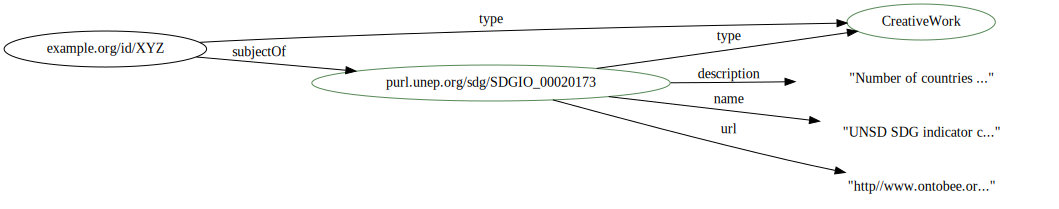

In [6]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/creativework.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "CreativeWork",
  "subjectOf": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)

## References

```{bibliography}
:style: unsrt
```